**This program was generated by ChatGPT using these instructions:**
*Please write a program in google colab using python that will take many views of checkerboard images and provide the camera calibration parameters*

**Instructions provided by ChatGPT:**

*To use this program in Google Colab, you'll need to upload your checkerboard images to the Colab environment. You can do this by clicking on the "Files" tab in the left sidebar, then clicking "Upload" and selecting the images you want to use.*

*Once you've uploaded your images, you can run the program by clicking on the "Runtime" menu and selecting "Run all". The program will then read in all the images, find the corners of the checkerboard in each image, and use those points to compute the camera calibration parameters. The camera matrix and distortion coefficients will be printed to the console when the program is finished running.*

In [1]:
import numpy as np
import cv2
import glob

In [2]:
#code block by Suthep
#this was created because Google Colab does not allow cv2.imshow, so must patch by cv2_imshow.
#If we switch over to regular jupyter notebook not on Colab, we can change c2_imshow to cv2.imshow.
from google.colab.patches import cv2_imshow #only used when running in Google Colab
def my_imshow(title, img ):
  print(title)
  cv2_imshow(img) #should be changed to c2.imshow when not in Colab

In [3]:
# Define the size of the checkerboard used in the images
checkerboard_size = (9, 6) #by Suthep. 9 rows (height: y-axis) by 6 columns (width: x-axis).

We can reshape any array into any shape, but the resulting array's number elements must remain the same. For example:

x = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]

Above x has 20 elements. You can make it a matrix of 2 x 2 x 5 which also has 20 elements using:

x_new = np.reshape(x, [2, 2, 5])

x_new will be:

[[[ 0  1  2  3  4]
    [ 5  6  7  8  9]]
          
[[10 11 12 13 14]
    [15 16 17 18 19]]]

Interestingly, we are allowed to have one “unknown” dimension. In such a case, pass -1 as the value (Eg: x_new2 = x.reshape(2, 2, -1)) and NumPy will calculate this number 5 for you in 3rd dimension.

In [ ]:
# GREATE GRID OPTION 1.  ChatGPT.
# Grid created by Chat GPT into objp.
# Define the real-world coordinates of the corners of the checkerboard
# comment by Suthep. objp has 54 x 3 zeros. Actually we use only 54 x 2, but here 3 because Point3D call in CV library
objp = np.zeros((checkerboard_size[0]*checkerboard_size[1], 3), np.float32)

print("objp before: \n", objp) #by Suthep


# comment by Suthep. create a 9x6 mesh of 2D points {0..8} x {0..5} (54 elements, 2D) , transpose it to 6 x 9,
#   reshape it to (-1, 2) which means (54,2). 9 x 6 x 2 transposed to 6 x 9 x 2 reshaped to 54 x 2
#   Means give me 54 (x, y) point values on a uniform grid of chess board
objp[:,:2] = np.mgrid[0:checkerboard_size[0],0:checkerboard_size[1]].T.reshape(-1,2)


print ("\nmgrid output is y is [0], x is [1]:\n", np.mgrid[0:checkerboard_size[0],0:checkerboard_size[1]]) #by Suthep

print("\nobjp after reshaped mesh: \n", objp) #by Suthep. OpenCV Requires objp to be Point3D
print ("\nOutput of mgrid T & reshaped: \n", np.mgrid[0:checkerboard_size[0],0:checkerboard_size[1]].T.reshape(-1,2)) #by Suthep

objp before: 
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

mgrid output is y is [0], x is [1]:
 [[[0 0 0 0 0 0]
  [1 1 1 1 1 1]
  [2 2 2 2 2 2]
  [3 3 3 3 3 3]
  [4 4 4 4 4 4]
  [5 5 5 5 5 5]
  [6 6 6 6 6 6]
  [7 7 7 7 7 7]
  [8 8 8 8 8 8]]

 [[0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]
  [0 1 2 3 4 5]]]

objp 

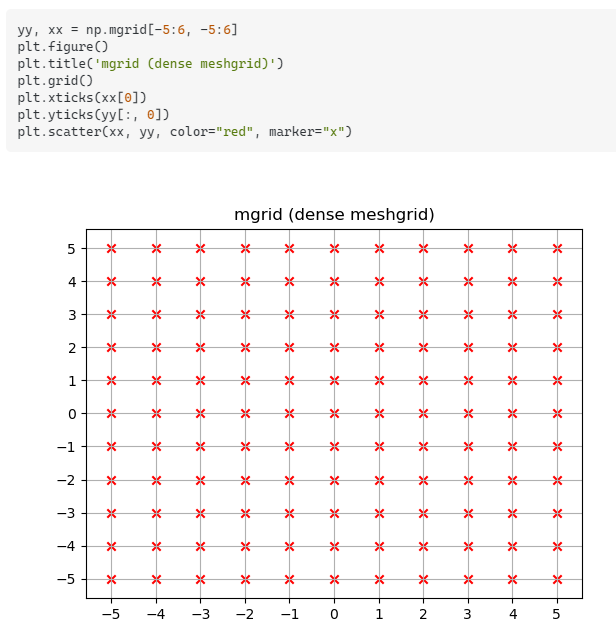

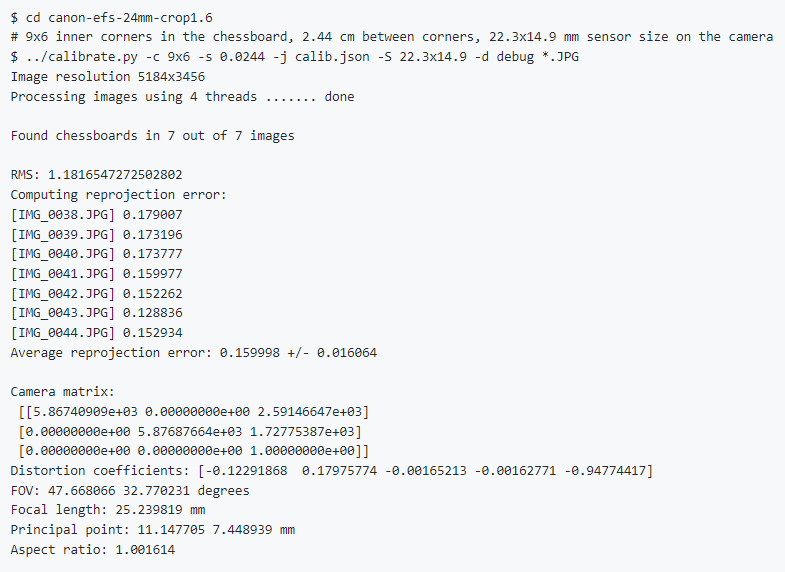


objp: 
 [[ 184.  184.    0.]
 [ 350.  184.    0.]
 [ 516.  184.    0.]
 [ 683.  184.    0.]
 [ 849.  184.    0.]
 [1015.  184.    0.]
 [1182.  184.    0.]
 [1348.  184.    0.]
 [1514.  184.    0.]
 [ 184.  350.    0.]
 [ 350.  350.    0.]
 [ 516.  350.    0.]
 [ 683.  350.    0.]
 [ 849.  350.    0.]
 [1015.  350.    0.]
 [1182.  350.    0.]
 [1348.  350.    0.]
 [1514.  350.    0.]
 [ 184.  516.    0.]
 [ 350.  516.    0.]
 [ 516.  516.    0.]
 [ 683.  516.    0.]
 [ 849.  516.    0.]
 [1015.  516.    0.]
 [1182.  516.    0.]
 [1348.  516.    0.]
 [1514.  516.    0.]
 [ 184.  683.    0.]
 [ 350.  683.    0.]
 [ 516.  683.    0.]
 [ 683.  683.    0.]
 [ 849.  683.    0.]
 [1015.  683.    0.]
 [1182.  683.    0.]
 [1348.  683.    0.]
 [1514.  683.    0.]
 [ 184.  849.    0.]
 [ 350.  849.    0.]
 [ 516.  849.    0.]
 [ 683.  849.    0.]
 [ 849.  849.    0.]
 [1015.  849.    0.]
 [1182.  849.    0.]
 [1348.  849.    0.]
 [1514.  849.    0.]
 [ 184. 1015.    0.]
 [ 350. 1015.    0.]
 [ 5

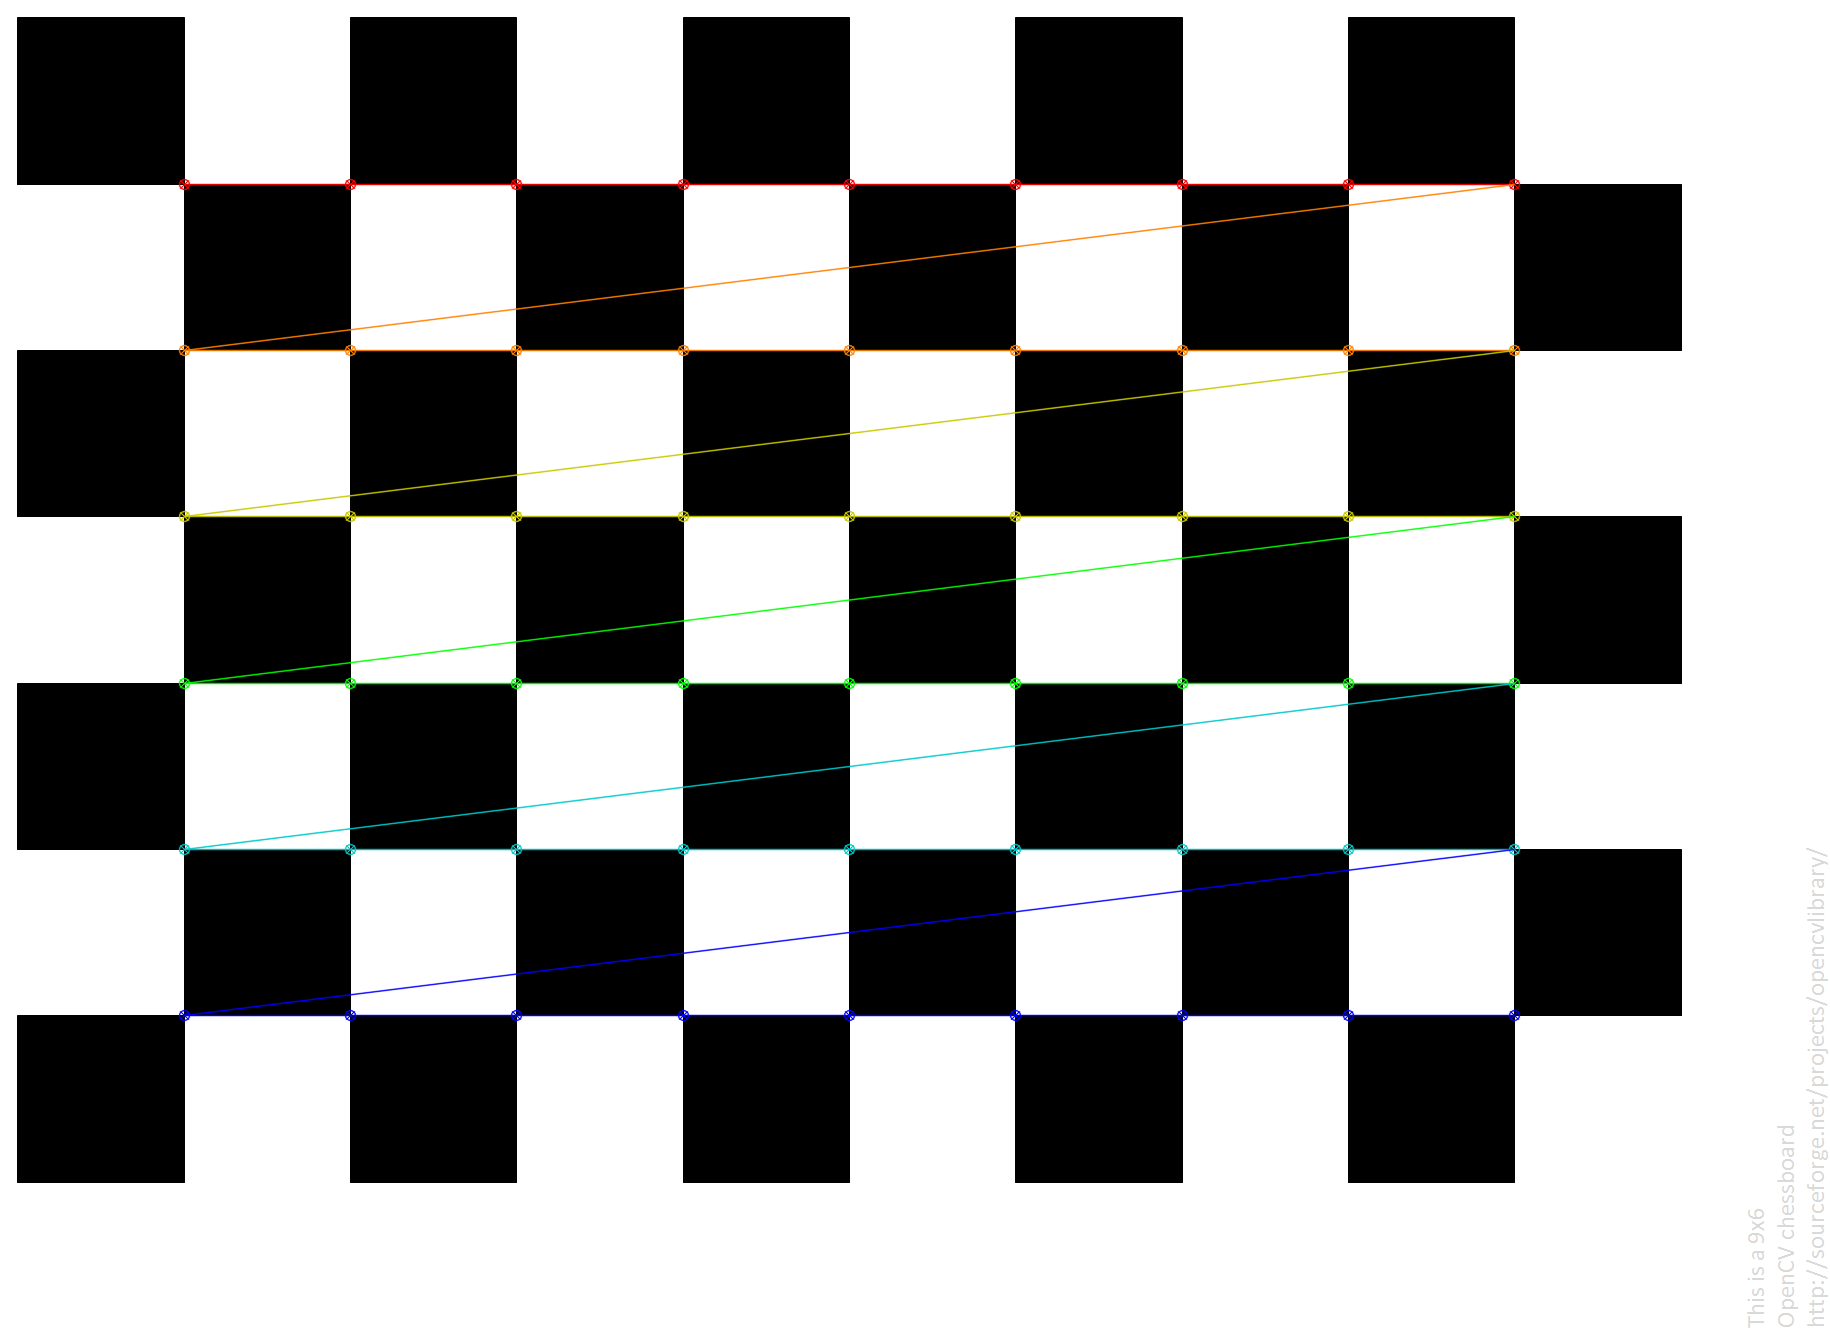

In [ ]:
# CREATE GRID OPTION 2 by Suthep
# Alternative grid by Suthep, reading corners directly from ideal 9x6 image
objp = np.zeros((checkerboard_size[0]*checkerboard_size[1], 3), np.float32)
fname = "checker_board_9x6_corners.png"
img = cv2.imread(fname)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, corners = cv2.findChessboardCorners(gray, checkerboard_size, None)

if ret == True:
    objp[:,:2] = corners [:, -1]
    print("\nobjp: \n", objp)
    img = cv2.drawChessboardCorners(img, checkerboard_size, corners, ret)
    my_imshow(fname + " with corners found", img ) #by Suthep
else:
    print("Error. World image grid corners not found.")

In [ ]:
# Create arrays to store object points and image points from all images
objpoints = []
imgpoints = []

In [ ]:
# Load all images of the checkerboard
# Comment by Suthep.  Images will have a list of jpg file names read
images = glob.glob('*.jpg')

In [ ]:
print ("Image Files Found: ", images) #by Suthep

Image Files Found:  ['left11.jpg', 'left13.jpg', 'left01.jpg', 'left02.jpg', 'left14.jpg', 'left05.jpg', 'left07.jpg', 'left09.jpg', 'left06.jpg', 'left03.jpg', 'left08.jpg', 'left12.jpg', 'left04.jpg']


In [ ]:
# Loop through each image and find the corners of the checkerboard
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, checkerboard_size, None)

    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw the corners on the image
        img = cv2.drawChessboardCorners(img, checkerboard_size, corners, ret)
        my_imshow(fname + " with corners found", img ) #by Suthep

Output hidden; open in https://colab.research.google.com to view.

In [4]:
#by suthep to understand array shape
ar = np.array([[12,20, 30] ,[13,15, 23]])
print (ar)
print("Shape of the array:", ar.shape)

[[12 20 30]
 [13 15 23]]
Shape of the array: (2, 3)


In [ ]:
# Use the object points and image points to compute the camera matrix, distortion coefficients, etc.

#By Suthep: intrinsic camera matrix, instrinsic lens distortion coefficients,
#        extrinsic rotation,  and extrinsic translation vectors etc.
width = gray.shape[1] #by Suthep
height = gray.shape[0] #by suthep
#ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)#removed by Suthep
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (width, height), None, None) #Simplified by Suthep

# Print the camera calibration parameters
print("\nCamera matrix:\n")
print(mtx)
print("\nDistortion coefficients:\n")
print(dist)


Camera matrix:

[[531.30737617   0.         341.77446778]
 [  0.         531.60004616 234.93957561]
 [  0.           0.           1.        ]]

Distortion coefficients:

[[-0.26683203 -0.05616177  0.00087658 -0.00042209  0.31369442]]


In [ ]:
print(width, height)

640 480


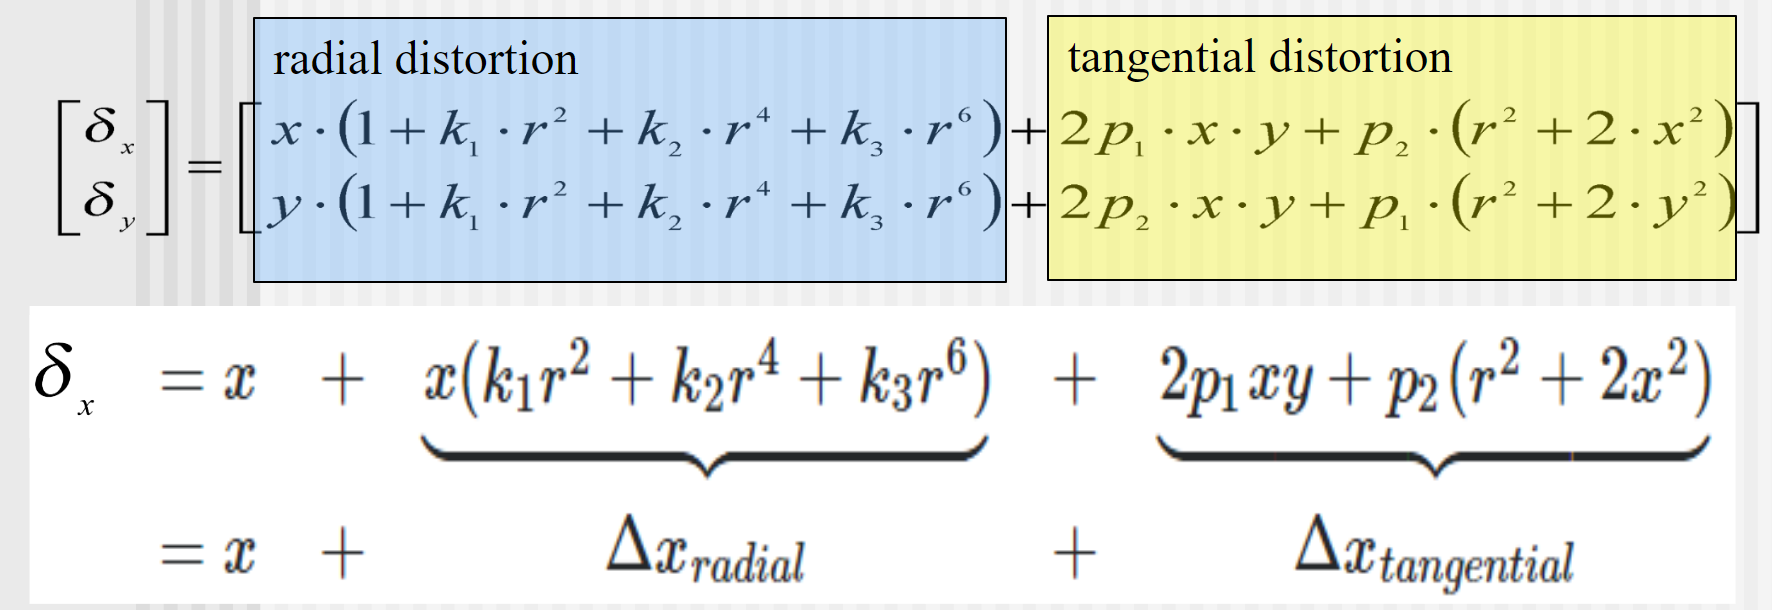

In [ ]:
#mtx = np.array([[fx, 0, cx],
#                [0, fy, cy],
#                [0, 0, 1]])
#dist = np.array([k1, k2, p1, p2, k3])

fx = mtx[0,0]
fy = mtx[1,1]
cx = mtx[0,2]
cy = mtx[1,2]
k1 = dist[0,0]
k2 = dist[0,1]
p1 = dist[0,2]
p2 = dist[0,3]
k3 = dist[0,4]
print("fx, fy, cx, cy: ", fx, fy, cx, cy)
print("k1, k2, k3, p1, p2", k1, k2, k3, p1, p2)

fx, fy, cx, cy:  531.307376167021 531.6000461613739 341.77446778454765 234.9395756126233
k1, k2, k3, p1, p2 -0.26683202978251214 -0.0561617660855964 0.31369442280203763 0.0008765827867644005 -0.00042209408259445626


In [ ]:
# Save the calibration results to a file
np.savez("calibration_results.npz", mtx=mtx, dist=dist)

**Continued Instructions to ChatGPT:**

*Please write the code to undistort an image using the output from the above*

**Instructions provided by ChatGPT:**

*In this code, replace your_image.jpg with the path to the image you want to undistort, and replace fx, fy, cx, cy, k1, k2, p1, p2, and k3 with the values for the camera matrix and distortion coefficients that were printed out by the previous program.*

*This code will display the original and undistorted images side by side. If you just want to display the undistorted image, you can remove the cv2.imshow('Original', img) line.*

In [ ]:
img = cv2.imread("left12.jpg")
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Undistort the image using the camera matrix and distortion coefficients
undistorted = cv2.undistort(img, mtx, dist)
# Find image size
h, w = undistorted.shape[:2] #height is [0], width is [1]

Original


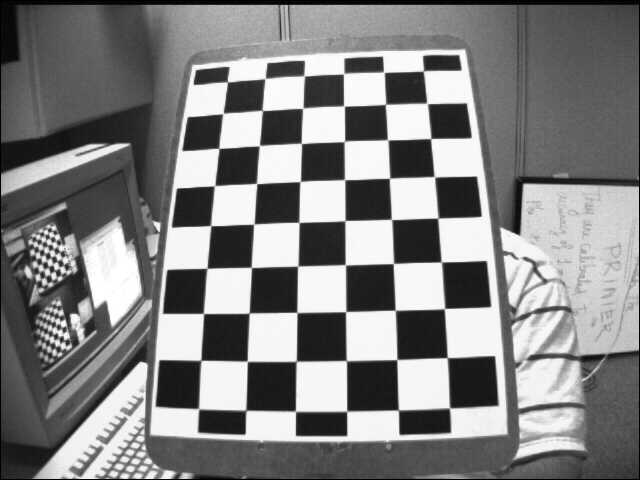

Undistorted


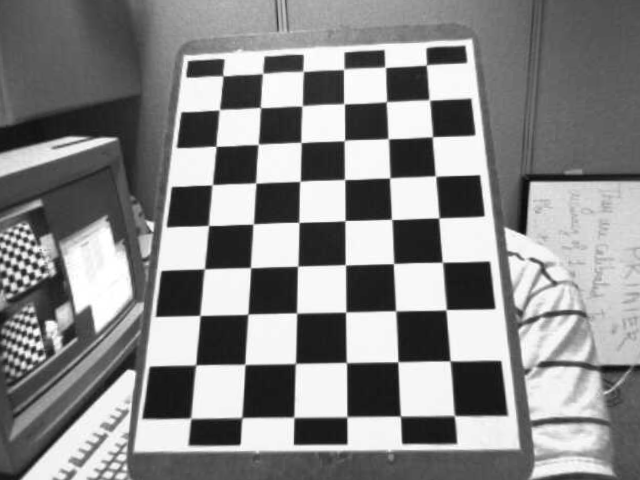

In [ ]:
# Show the original and undistorted images side by side
my_imshow('Original', img)
my_imshow('Undistorted', undistorted)

In [ ]:
cv2.imwrite('distorted.png',img)
cv2.imwrite('undistorted.png',undistorted)

True

In [ ]:
#Use mtx, dist, rvecs, tvecs.  Use checkerboard_size, objp
# renaming intrinsic camera parameters:
camera_matrix = mtx
dist_coeffs = dist
pattern_size = checkerboard_size
undistorted_img = cv2.imread("left12.jpg") #index 11
rvec = rvecs[11]
tvec = tvecs[11]
h,w = undistorted_img.shape[0], undistorted_img.shape[1]

CHAT GPT CODE

Creating a checkerboard image

In [ ]:
# Define the full checkerboard size it should be inner corner + 1 for width and height
pattern_size = (10,7) #x - width, y - height

# Generate the object points for the checkerboard pattern
objp = np.zeros((np.prod(pattern_size), 3), dtype=np.float32)
objp[:, :2] = np.mgrid[0:pattern_size[0], 0:pattern_size[1]].T.reshape(-1, 2)

Created Image


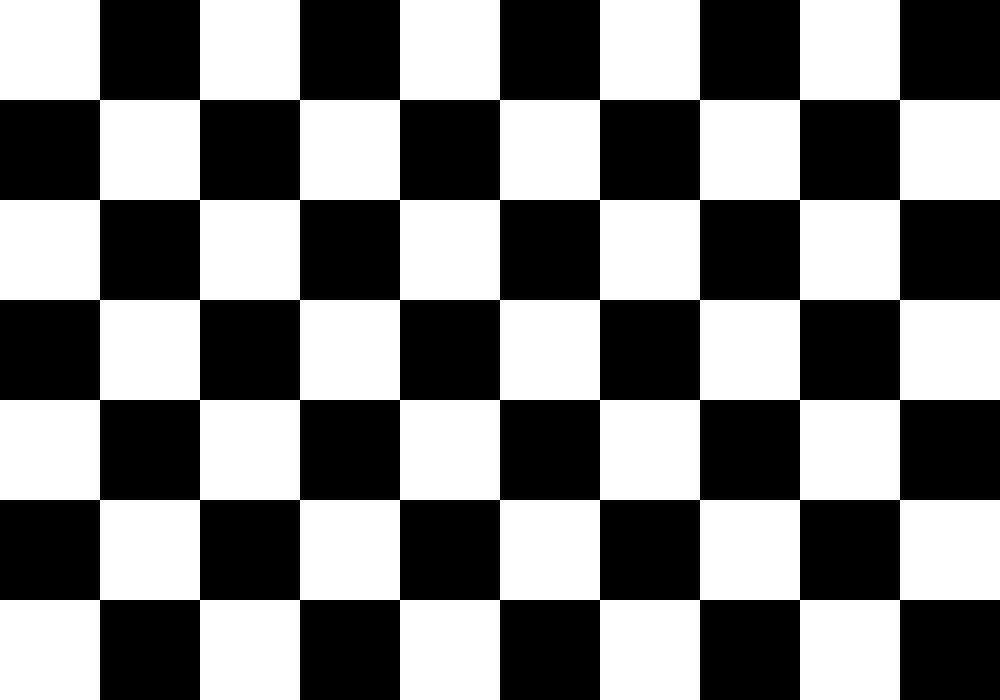

True

In [ ]:
# Create an image with the checkerboard pattern
img = np.zeros((pattern_size[1]*100, pattern_size[0]*100), dtype=np.uint8)
for i in range(pattern_size[1]):
    for j in range(pattern_size[0]):
        if (i+j) % 2 == 0:
            img[i*100:(i+1)*100, j*100:(j+1)*100] = 255

my_imshow('Created Image', img)
cv2.imwrite('checkerboard.png', img)

In [ ]:
# Compute extrinsic matrix
R = cv2.Rodrigues(rvec)[0]
t = tvec.reshape(-1, 1)
extrinsic_matrix = np.hstack((R, t)) #horizontal stack 2 matrices into 1
print('R: \n', R)
print('t: \n', t)
print('extrinsic matrix: \n', extrinsic_matrix)

R: 
 [[ 0.00589557 -0.99744133  0.07124634]
 [ 0.93009025  0.03163811  0.36596606]
 [-0.36728378  0.06410795  0.92789698]]
t: 
 [[ 521.73662807]
 [-856.61516362]
 [2184.28479133]]
extrinsic matrix: 
 [[ 5.89557161e-03 -9.97441327e-01  7.12463407e-02  5.21736628e+02]
 [ 9.30090248e-01  3.16381081e-02  3.65966064e-01 -8.56615164e+02]
 [-3.67283776e-01  6.41079476e-02  9.27896977e-01  2.18428479e+03]]


In [ ]:
#corrected_img = cv2.warpPerspective(undistorted_img,extrinsic_matrix,(w,h),flags=cv2.INTER_LINEAR)

error: ignored

In [ ]:
# Project image points to world coordinates
img_points = cv2.findChessboardCorners(undistorted_img, pattern_size)[1]
world_points = cv2.projectPoints(objp, rvec, tvec, camera_matrix, dist_coeffs)[0]


Undistorted Image with Projected Points


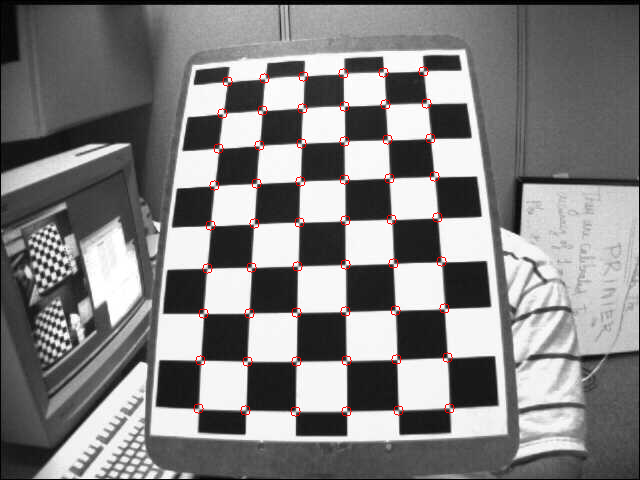

In [ ]:
# Draw projected points on image and display
for i in range(len(world_points)):
    x, y = int(world_points[i][0][0]), int(world_points[i][0][1])
    #cv2.circle(image, center_coordinates, radius, color, thickness)
    cv2.circle(undistorted_img, (x, y), 5, (0, 0, 255), 1) #color = (0,0,255)

my_imshow("Undistorted Image with Projected Points", undistorted_img)